# 비지도학습

## 1) 차원축소 - PCA

In [2]:
import pandas as pd
from sklearn.datasets import load_wine # 와인 데이터 불러오기

In [4]:
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### scaling

In [5]:
from sklearn.preprocessing import StandardScaler
# 값 정규화 진행
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [11]:
# 데이터 복사 (df)
df = data.copy()

## PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 몇개의 피처로 줄일 것인감

In [13]:
df = pca.fit_transform(df)
df.shape

(178, 2)

In [14]:
# sample data확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

### PCA 2차원 시각화

In [16]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [17]:
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


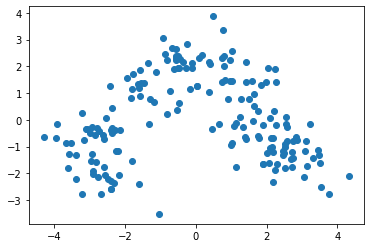

In [19]:
# scatter
plt.scatter(df.iloc[:, 0], df.iloc[:, 1]);

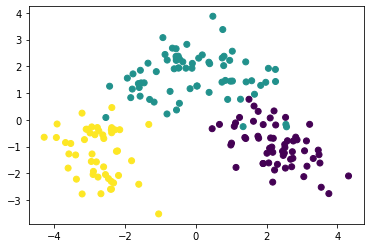

In [23]:
# scatter (c=target)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target);

In [25]:
# 축소되어 만들어진 피처가 각각 얼마나 설명력을 갖는가
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.65333406 0.34666594]
1.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 2000)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9661904761904762

In [29]:
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

0.9777777777777779

### PCA 3차원 시각화

In [31]:
pca = PCA(n_components = 3)
df  = data.copy()

df = pca.fit_transform(df)
df = pd.DataFrame(df)

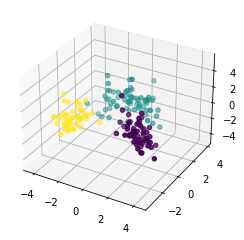

In [39]:
# 시각화 3차원
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=dataset.target);

### 점진적 PCA
- batch를 통해 점진적으로 수행하는 방법
- dataset이 큰 경우 사용

In [42]:
from sklearn.decomposition import IncrementalPCA

In [47]:
df = data.copy()

pca = IncrementalPCA(n_components=2, batch_size=16)

In [48]:
# 점진적 PCA 변환

df = pca.fit_transform(df)

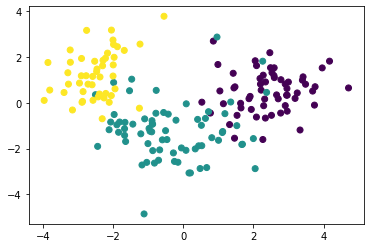

In [49]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target);

In [50]:
# 축소되어 만들어진 피처가 각각 얼마나 설명력을 갖는가
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001543964


### 희소 PCA
- 적절한 희소성을 alpha 값으로 유지
- 오버피팅 방지

In [51]:
from sklearn.decomposition import SparsePCA

In [53]:
df = data.copy()
pca = SparsePCA(alpha = 0.01)

df = pca.fit_transform(df)

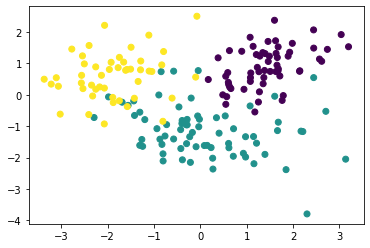

In [54]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target);

### 커널 PCA
- 비선형으로 차원을 축소

In [55]:
from sklearn.decomposition import KernelPCA

In [60]:
df = data.copy()
pca = KernelPCA(n_components=2)
df = pca.fit_transform(df)

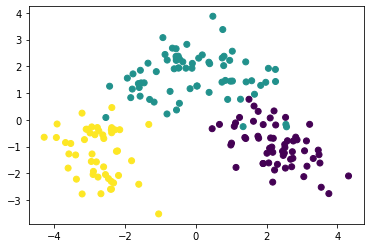

In [61]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target);

### 특이값 분해 SVD ( Singualr Value Decomposition )

- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

In [62]:
from sklearn.decomposition import TruncatedSVD

In [63]:
df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)

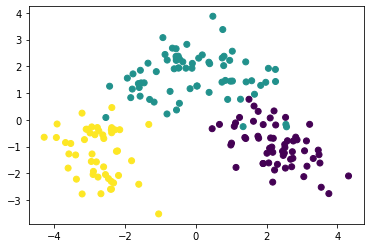

In [64]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target);

## 2. 군집화